In [10]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

#데이터셋 로드
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris.data, iris.target] , 
                  columns= ['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

In [11]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### 2차원 t-SNE 시각화 파이썬 코드

In [12]:
from sklearn.manifold import TSNE

# class target 정보 제외
train_df = df[['sepal length', 'sepal width', 'petal length', 'petal width']]

# 2차원 t-SNE 임베딩
tsne_np = TSNE(n_components = 2).fit_transform(train_df)

# numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])

d:\Users\peunj\anaconda3\envs\graph2edits\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

d:\Users\peunj\anaconda3\envs\graph2edits\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [13]:
tsne_df

,component 0,component 1
0,-11.621593,-19.900398
1,-11.118473,-22.631676
2,-12.285942,-22.310240
3,-11.970762,-22.813902
4,-12.051280,-19.874796
...,...,...
145,6.191989,16.566223
146,7.242778,13.476447
147,6.457773,15.632294
148,8.065139,16.985893


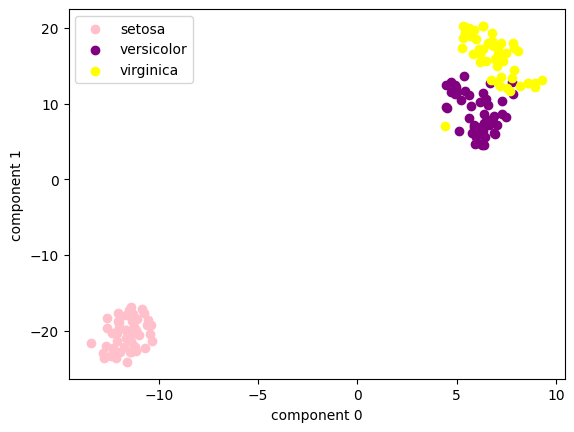

In [14]:
import matplotlib.pyplot as plt

# class target 정보 불러오기 
tsne_df['target'] = df['target']

# target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]

# target 별 시각화
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'pink', label = 'setosa')
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color = 'purple', label = 'versicolor')
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], color = 'yellow', label = 'virginica')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

### 3차원 t-SNE 시각화 파이썬 코드

In [15]:
# 3차원 t-SNE 임베딩
tsne_np = TSNE(n_components = 3).fit_transform(train_df)

# numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1', 'component 2'])

d:\Users\peunj\anaconda3\envs\graph2edits\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

d:\Users\peunj\anaconda3\envs\graph2edits\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [16]:
tsne_df

,component 0,component 1,component 2
0,-32.822498,61.871136,77.558624
1,-75.832405,-48.055454,163.330795
2,54.749298,0.637285,136.048782
3,87.384819,-26.375019,151.573059
4,45.884819,-51.355389,73.916183
...,...,...,...
145,-62.836048,97.611366,-23.091763
146,1.758870,6.471855,-87.995972
147,-30.940542,44.727406,-71.497597
148,-59.075714,134.723373,-53.873165


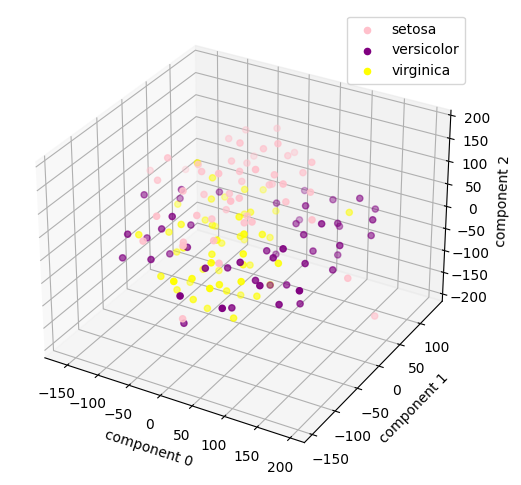

In [17]:
from mpl_toolkits.mplot3d import Axes3D

# 3차원 그래프 세팅
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

# class target 정보 불러오기 
tsne_df['target'] = df['target']

# target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]

# target 별 시각화
ax.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], tsne_df_0['component 2'], color = 'pink', label = 'setosa')
ax.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], tsne_df_1['component 2'], color = 'purple', label = 'versicolor')
ax.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], tsne_df_2['component 2'], color = 'yellow', label = 'virginica')

ax.set_xlabel('component 0')
ax.set_ylabel('component 1')
ax.set_zlabel('component 2')
ax.legend()
plt.show()

In [18]:
import plotly.graph_objs as go
import numpy as np

# class target 정보 불러오기
tsne_df['target'] = df['target']

# target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]

# Define the colors for each target category
colors = ['pink', 'purple', 'yellow']

# Create the scatter plot
fig = go.Figure()

# Scatter plot for each target category
for i, df in enumerate([tsne_df_0, tsne_df_1, tsne_df_2]):
    fig.add_trace(go.Scatter3d(
        x=df['component 0'],
        y=df['component 1'],
        z=df['component 2'],
        mode='markers',
        marker=dict(
            size=4,
            color=colors[i],
            opacity=0.8
        ),
        name=['setosa', 'versicolor', 'virginica'][i]
    ))

# Add axis labels
fig.update_layout(
    scene=dict(
        xaxis_title='component 0',
        yaxis_title='component 1',
        zaxis_title='component 2'
    )
)

# Show the plot
fig.show()
